# 363-1098-00L Business Analytics FS2020

## Focus: Supervised Machine Learning

Group Members: 
Syed Shahvaiz Ahmed (syahmed)
Nael Prelaz (nprelaz)
Clive Charles Javara (javarac)

Topic: Telecommunication customer retain
Link: Telco Customer Churn
Data Source: Kaggle

Problem Statement: Analyze all relevant data and learn behavior to retain customers.

Motivation:

The primary motivation for attrition rates came during the Business Analytics class only (check submitted presentation) where we had an idea about using ML algorithms to train and retain employees. We wanted to work on similar lines and we found this dataset which differs in a manner that this allows for retaining Telco customers. The dataset is nice and clean and offers a decent prediction problem based on the customer’s behavior. If a company can identify as to which customers are going to cancel their subscriptions then they can target them specifically with offers in order to retain them. The dataset deals with “text” and “numbers” and will give us an exciting opportunity to learn as to how to deal with such a situation (which is pretty common in the industry). 


## Data Set Description: 

Context: "Predict behavior to retain customers. We analyze all relevant customer data and develop focused customer retention programs."

Content: Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

## Description of Variables in the dataset.

- customerID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

## Project Overview:

1. Data Overview
    - Missing Value Identification
2. Data Manipulation
3. Exploratory Data Analysis
    - 3.1 Overall distribution of the Churn Variable
    - 3.2 Distribution of Categorical variables across the attrition (Churn and Non Churn)
4. Data preprocessing
5. Model Building
    - 5.1 Logistic Regression
    - 5.2 Random Forest 
    - 5.3 K Nearest Neigbour
    - 5.4 Support Vector Machine
    -
6. Model Comparison
7. Conclusion

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [83]:
# Importing all the relevant packages for Exploratory data analysis and Model development.

%matplotlib inline
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

# General math, csv and plotting modules.
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

# Widget and formatting modules
import ipywidgets
from ipywidgets import interact, interactive, interact_manual
import pylab
import seaborn as sns
pylab.rcParams['figure.figsize'] = (10, 5)

# Visualization Libraries
import io
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
#import plotly.figure_factory as ff

# Loading the required libraries 
import sklearn
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from statistics import mode
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Data Overview

In [9]:
# Reading the file that contains the data
telco_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Showing few rows of the data
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Number of Rows and Columns in the dataset
print ("Rows and Columns: ",telco_df.shape)
# Number of Features that we have to deal with
print ("\n Number of Features : \n",telco_df.columns.tolist())
# To track categorical, binary and textual data
print ("\nUnique values :  \n",telco_df.nunique())

Rows and Columns:  (7043, 21)

 Number of Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


### 1.1 Missing value Identification

In [11]:
## To check missing values in terms of spaces. We find out that Total Charges has missing values that need to be removed
def unique(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

missingvalue = 0
missingcolumn = []
for i in telco_df.columns:
    for j in telco_df[i].tolist():
        if  j == ' ':
            missingvalue += 1
            missingcolumn.append(i)
print(missingvalue)
print(unique(missingcolumn))

11
['TotalCharges']


## 2. Data Manipulation

This is a necessary step because then we can categorize a few things. 

Formally stating: 
1. We can remove the missing values of TotalCharges from our analysis
2. Make a few more modifications from the observed categorical variables
3. Make further distinction in our categorical variables 

This is done so that we can start with our Exploratory Data Analysis

Side Note: Confidence was garnered after we looked at the dataset properly in STATA

In [12]:
# Replacing and Removing the missing values that were identified in the part before
telco_df['TotalCharges'] = telco_df["TotalCharges"].replace(' ',np.nan)
telco_df = telco_df[telco_df["TotalCharges"].notnull()]
print(telco_df.shape) # Notice that the row size has reduced by 11.
telco_df = telco_df.reset_index()[telco_df.columns]

#convert to float type
telco_df["TotalCharges"] = telco_df["TotalCharges"].astype(float)

# To align data set in "Yes and No" settings. Can account for 17 variables in this manner.
categorical_df = telco_df.loc[:, telco_df.dtypes == "object"]
del categorical_df['customerID']
for col in categorical_df.columns.tolist():
    print(telco_df[col].value_counts())
print(telco_df['SeniorCitizen'].value_counts())

(7032, 21)
Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: 

In [13]:
# Replacing 'No internet service' to No for the following columns (can also be found in Variable description above)
align_columns = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for i in align_columns : 
    telco_df[i]  = telco_df[i].replace({'No internet service' : 'No'})

#Similarly for "MultipleLines" variable we replace 'No phone service' to No
telco_df['MultipleLines'] = telco_df['MultipleLines'].replace({'No phone service': 'No'})
    
# Similarly for the variable "Senior Citizen" we convert it into values 
telco_df['SeniorCitizen'] = telco_df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Separating churn and non churn customer datasets
churn     = telco_df[telco_df["Churn"] == "Yes"]
non_churn = telco_df[telco_df["Churn"] == "No"]

#Separating catagorical and numerical columns for EDA
Id_col     = ['customerID']
target_col = ["Churn"]
numeric_columns = telco_df._get_numeric_data().columns.tolist()
categorical_columns = list(set(telco_df.columns.tolist())- set(numeric_columns) - set(Id_col) - set(target_col))
print("Number of Categorical Features: ", len(categorical_columns))
print("Number of Numeric Features: ", len(numeric_columns))

Number of Categorical Features:  16
Number of Numeric Features:  3


## 3. Exploratory Data Analysis

We have a feature set of 19 columns that need to be explored in their connection with Churn and Non-Churn.

### 3.1 Overall distribution of the Churn Variable

In [14]:
# Visualizing Churn and Non-Churn percentage using plotly library

trace_pie = go.Pie(labels = telco_df['Churn'].value_counts().keys().tolist(),
                  values = telco_df['Churn'].value_counts().values.tolist(),
                  textfont = dict(size = 15), opacity = 0.8,
                  marker = dict(colors=['lightblue','gold'], 
                           line=dict(color='#000000', width=1.5)),
                  rotation = 90,
                  hoverinfo = "label +value")

layout = dict(title =  'Distribution of Churn and Non-Churn Customers',
                        autosize = False,
                        height  = 500,
                        width   = 800)
           
fig = dict(data = [trace_pie], layout=layout)
py.iplot(fig)

NameError: name 'go' is not defined

### 3.2 Distribution of Categorical variables across the attrition *(Churn and Non Churn)*

In [15]:
# Defining a function so we can use it for all the categorical variables that were defined above. 
# We will use the same code that was defined above (a bit modified ofcourse).
def pie_plot_func (column_name):
    
    # For Churn customers (Section 2)
    trace_pie_1 = go.Pie(labels = churn[column_name].value_counts().keys().tolist(),
                  values = churn[column_name].value_counts().values.tolist(),
                  textfont = dict(size = 15), opacity = 0.8,
                  hole = 0.6,
                  hoverinfo = "label+percent",
                  domain = dict(x = [0,.48]),
                  name = "Churn Customers",
                  marker = dict(colors=['lightblue','gold'],line = dict(width = 2, color = '#000000')))
    
    # For Non Churn customers (Section 2)
    trace_pie_2 = go.Pie(labels = non_churn[column_name].value_counts().keys().tolist(),
                  values = non_churn[column_name].value_counts().values.tolist(),
                  textfont = dict(size = 15), opacity = 0.8,
                  hole = 0.6,
                  hoverinfo = "label+percent",
                  domain = dict(x = [.52,1]),
                  name = "Non churn customers",
                  marker = dict(colors=['lightblue','gold'],line = dict(width = 2,color = '#000000')))
    
    # Defining layout for the traces
    layout = dict(title = column_name + " distribution in Churn/NonChurn",  autosize = False,
                  height = 500,
                  width = 900,
                  annotations = [dict(text = "Churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                 dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .87,y = .5
                                               )])
    fig = dict(data = [trace_pie_1, trace_pie_2], layout = layout)
    py.iplot(fig)

for var in categorical_columns:
    pie_plot_func(var)

NameError: name 'go' is not defined

### 3.3 Distribution of Numerical variables across the attrition (Churn and Non Churn)

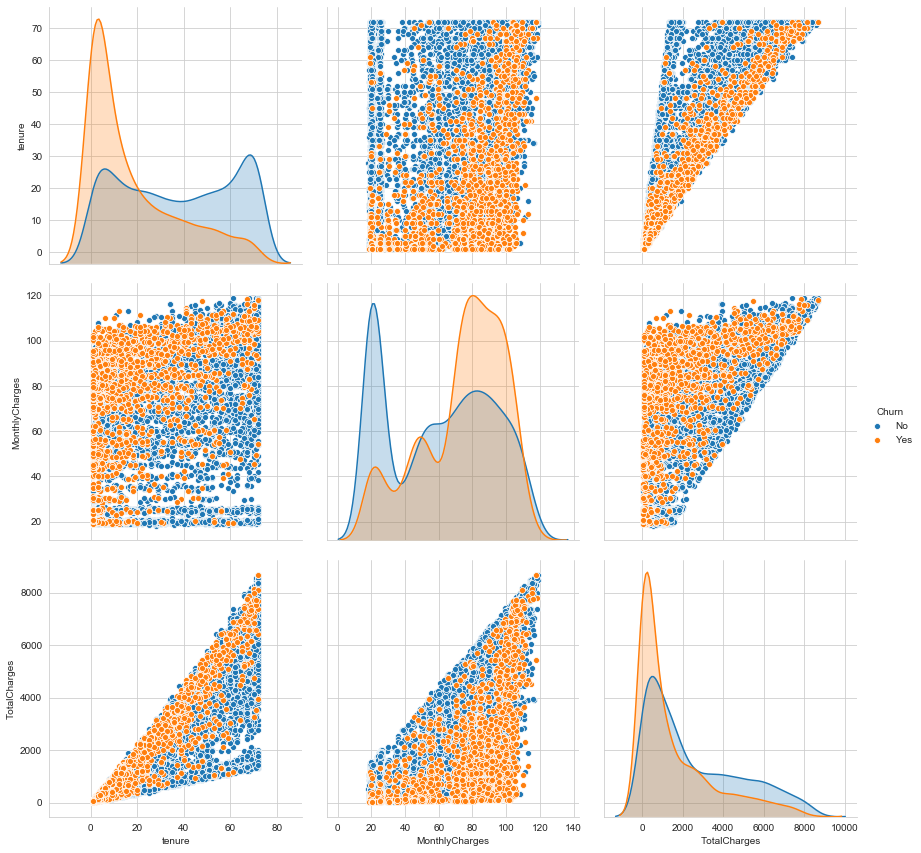

In [16]:
#2_d Scatter plot with color-coding for each feature type using seaborn 
sns.set_style("whitegrid");
sns.pairplot(telco_df,hue="Churn",size=4);
plt.show();

Few things to note from the seaborne plot above is that the highest churn customers were in the bracket of low tenure and high monthly charges. We also see a clear cut positive relationship between tenure and total charges. This kind of exploration is important as it will be used later in feature engineering for models. 

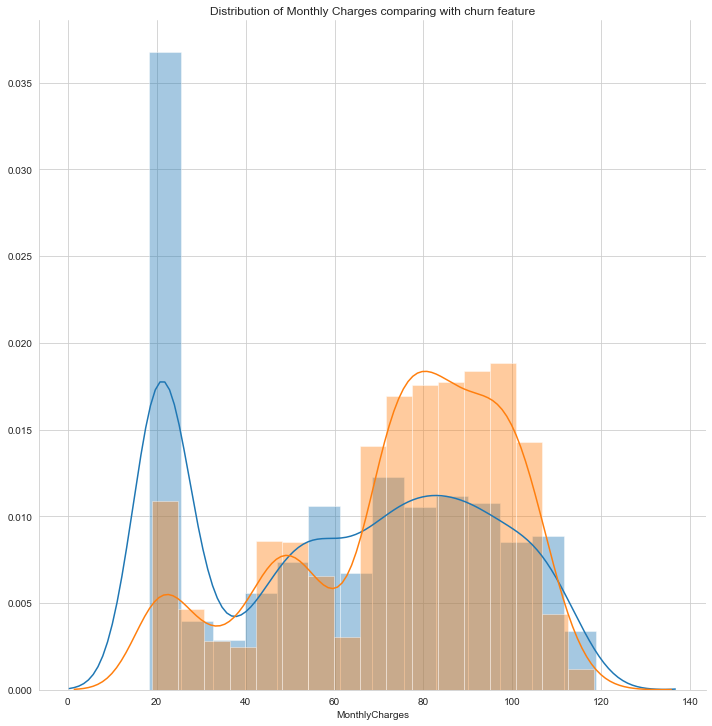

In [17]:
# Exploring the monthly charges feature
plot = sns.set_style("whitegrid");
sns.FacetGrid(telco_df, hue="Churn", size=10, margin_titles = True) \
   .map(sns.distplot,"MonthlyCharges",)
plt.title('Distribution of Monthly Charges comparing with churn feature')
plt.show();

Higher Monthly charges lead to a higher attrition rate.

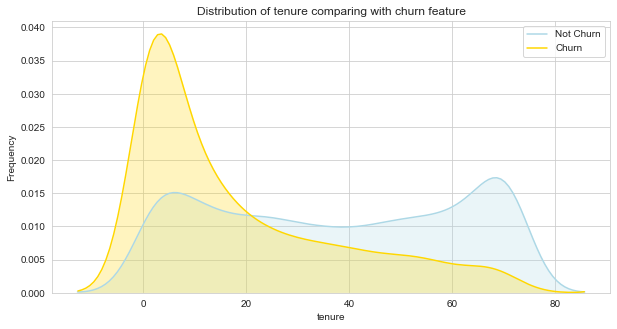

In [18]:
# Exploring the tenure feature
g = sns.kdeplot(telco_df.tenure[(telco_df["Churn"] == 'No') ], color="lightblue", shade = True)
g = sns.kdeplot(telco_df.tenure[(telco_df["Churn"] == 'Yes') ], ax =g, color="gold", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

Customers who Churn are often new customers. Their tenure track is quite low.

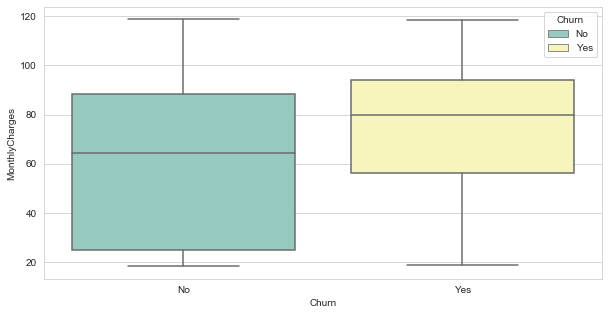

In [19]:
# Exploring the Monthly Charges feature
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', hue = 'Churn', data = telco_df, palette="Set3", dodge = False)
plt.show()

What we also see from here is that people who Churn have relatively high Monthly Charges as compared to customers who don't churn.

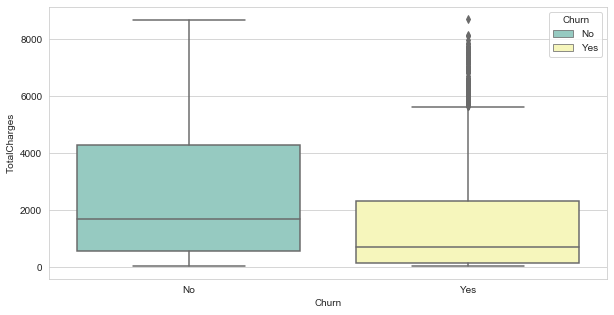

In [20]:
# Exploring the Total Charges feature
sns.boxplot(x = 'Churn', y = 'TotalCharges', hue = 'Churn', data = telco_df, palette="Set3", dodge = False)
plt.show()

What we also see from here is that people who Churn have relatively low Total Charges as compared to customers who don't churn.

## Data preprocessing for model 

In [55]:
#Importing the CSV FILE
df_tele= pd.read_csv('TelcoCustomerChurn.csv')

In [56]:
#Replace empty values in totalcharge swith NAN
df_tele['TotalCharges'] = df_tele['TotalCharges'].replace(" ",np.nan)

In [57]:
print ("\nMissing values :  ", df_tele.isnull().sum().values.sum())


Missing values :   11


In [58]:
#convert to float type
df_tele["TotalCharges"] = df_tele["TotalCharges"].astype(float)

In [59]:
#Drop customer ID as it wont affect the churning rate at all
df_tele.drop(['customerID'], axis=1, inplace=True)

In [60]:
#Changing the values from out target (churn to numeric 1s and 0s)
df_tele['Churn'] = df_tele['Churn'].map(lambda s :1  if s =='Yes' else 0)

In [61]:
#Seperate column for male and female 
#df_tele = pd.get_dummies(data=df_tele, columns=['gender'])

In [62]:
#Changing values of Partner to numeric for better processing (0s and 1s)
df_tele['Partner'] = df_tele['Partner'].map(lambda s :1 if s =='Yes' else 0)

In [63]:
#Changing values of Gender to numeric for better processing (0s and 1s)
df_tele['gender'] = df_tele['gender'].map(lambda s :1 if s =='Male' else 0)

In [64]:
#Similarily repeat for other features where it is possible to classify into binary values 
#Dependents, PhoneServices, PaperlessBilling 
df_tele['Dependents'] = df_tele['Dependents'].map(lambda s :1 if s =='Yes' else 0)
df_tele['PhoneService'] = df_tele['PhoneService'].map(lambda s :1 if s =='Yes' else 0)
df_tele['PaperlessBilling'] = df_tele['PaperlessBilling'].map(lambda s :1 if s =='Yes' else 0)

In [65]:
#For MutipleLines we can see 3 categorial values yes no and NO phone Service 
#After analysing we can consider NoPhoneService as also NO 
#Therefore we can convert this into numNo phone service
df_tele['MultipleLines'].replace('No phone service','No', inplace=True)
df_tele['MultipleLines'] = df_tele['MultipleLines'].map(lambda s :1 if s =='Yes' else 0)

In [66]:
#Similar procedure for OnlineSecurity
df_tele['OnlineSecurity'].replace('No phone service','No', inplace=True)
df_tele['OnlineSecurity'] = df_tele['OnlineSecurity'].map(lambda s :1 if s =='Yes' else 0)
#OnlineBackup
df_tele['OnlineBackup'].replace('No phone service','No', inplace=True)
df_tele['OnlineBackup'] = df_tele['OnlineBackup'].map(lambda s :1 if s =='Yes' else 0)
#StreamingTV
df_tele['StreamingTV'].replace('No phone service','No', inplace=True)
df_tele['StreamingTV'] = df_tele['StreamingTV'].map(lambda s :1 if s =='Yes' else 0)
#StreamingMovies
df_tele['StreamingMovies'].replace('No phone service','No', inplace=True)
df_tele['StreamingMovies'] = df_tele['StreamingMovies'].map(lambda s :1 if s =='Yes' else 0)
#DeviceProtection
df_tele['DeviceProtection'].replace('No phone service','No', inplace=True)
df_tele['DeviceProtection'] = df_tele['DeviceProtection'].map(lambda s :1 if s =='Yes' else 0)
#TechSupport
df_tele['TechSupport'].replace('No phone service','No', inplace=True)
df_tele['TechSupport'] = df_tele['TechSupport'].map(lambda s :1 if s =='Yes' else 0)

In [67]:
#Tenure - Converting values to categorical valeus 
def tenure_cateorize(df_tele) :
    if df_tele["tenure"] <= 12 :
        return "0-12 Mts."
    elif (df_tele["tenure"] > 12) & (df_tele["tenure"] <= 24 ):
        return "12-24 Mts."
    elif (df_tele["tenure"] > 24) & (df_tele["tenure"] <= 48) :
        return "24-48 Mts."
    elif (df_tele["tenure"] > 48) & (df_tele["tenure"] <= 60) :
        return "48-60 Mts."
    elif df_tele["tenure"] > 60 :
        return "grt_60 Mts."
df_tele["Tenure_Group"] = df_tele.apply(lambda df_tele:tenure_cateorize(df_tele),axis = 1)

In [68]:
#Seperate feature Tenure_Group with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['Tenure_Group'])

In [69]:
#Making a seperate column for DSL and Fiber optic with converted values 1s and 0s
df_tele['Fiber_optic'] = df_tele['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
df_tele['DSL'] = df_tele['InternetService'].map(lambda s :1  if s =='DSL' else 0)
df_tele['Has_InternetService'] = df_tele['InternetService'].map(lambda s :0  if s =='No' else 1)

In [70]:
#Since we have seperted the Internetservice column for each Value we do not need the internet service column anymore 
del df_tele['InternetService']

In [71]:
#Seperate feature Paymentvalues with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['PaymentMethod'])

In [72]:
#Seperate feature Contracts with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['Contract'])

In [73]:
#to rearrange columns
columns = ['Churn','TotalCharges','MonthlyCharges','gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','Has_InternetService','DSL','Fiber_optic','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Tenure_Group_0-12 Mts.','Tenure_Group_12-24 Mts.','Tenure_Group_24-48 Mts.','Tenure_Group_48-60 Mts.','Tenure_Group_grt_60 Mts.','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','Contract_Month-to-month','Contract_One year','Contract_Two year']

In [75]:
df_tele_final = df_tele.reindex(columns=columns)

In [79]:
#Here we standardize the remaining two columns totalcharges and MonthlyCharges 
df_tele_final[['TotalCharges', 'MonthlyCharges']] = StandardScaler().fit_transform(df_tele_final[['TotalCharges', 'MonthlyCharges']])

In [80]:
pd.set_option('display.max_columns', None)
df_tele_final

,Churn,TotalCharges,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Has_InternetService,DSL,Fiber_optic,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure_Group_0-12 Mts.,Tenure_Group_12-24 Mts.,Tenure_Group_24-48 Mts.,Tenure_Group_48-60 Mts.,Tenure_Group_grt_60 Mts.,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,-0.994194,-1.160323,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
1,0,-0.173740,-0.259629,1,0,0,0,34,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,1,-0.959649,-0.362660,1,0,0,0,2,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
3,0,-0.195248,-0.746535,1,0,0,0,45,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,1,-0.940457,0.197365,0,0,0,0,2,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
5,1,-0.645369,1.159546,0,0,0,0,8,1,1,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0
6,0,-0.147313,0.808907,1,0,0,1,22,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
7,0,-0.874169,-1.163647,0,0,0,0,10,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
8,1,0.336516,1.330711,0,0,1,0,28,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0
9,0,0.531476,-0.286218,1,0,0,1,62,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0


## Model Building

## Baseline Model - Logistic Regression

In [23]:
#Importing the Preprocessed CSV FILE
df_tele= pd.read_csv('Cleaned_DataFrame_final_1.csv')
pd.set_option('display.max_columns', None)
df_tele.head()

,Churn,TotalCharges,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Has_InternetService,DSL,Fiber_optic,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure_Group_0-12 Mts.,Tenure_Group_12-24 Mts.,Tenure_Group_24-48 Mts.,Tenure_Group_48-60 Mts.,Tenure_Group_grt_60 Mts.,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,-0.994194,-1.161694,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
1,0,-0.173740,-0.260878,1,0,0,0,34,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,1,-0.959649,-0.363923,1,0,0,0,2,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
3,0,-0.195248,-0.747850,1,0,0,0,45,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,1,-0.940457,0.196178,0,0,0,0,2,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
#Detailed info about the DataSet
df_tele.info()

In [22]:
#Splitting into features (X_train) and target (y_train)
x_train = df_tele.iloc[:,1:]
y_train = df_tele.iloc[:,0:1]

In [ ]:
#To determind the influence of different features on the target feature 
#best_features = SelectKBest(score_func=chi2, k = 31)
#fit_1 = best_features.fit(x_train,y_train)

#dfscores = pd.DataFrame(fit_1.scores_)
#dfcolumns = pd.DataFrame(x_train##.columns)

#featureScores = pd.concat([dfcolumns,dfscores], axis=1)
#featureScores.columns = ['Specs','Scores'] 

#featureScores

In [30]:
#Drop columns which have less impact to the target feature 
x_train.drop(['PhoneService'], axis=1, inplace=True)
x_train.drop(['gender'], axis=1, inplace=True)
#x_train.drop(['MultipleLines'], axis=1, inplace=True)
#x_train.drop(['Tenure_Group_12-24 Mts.'], axis=1, inplace=True)
x_train.drop(['DeviceProtection'], axis=1, inplace=True)

#### Logistic Regression

In [33]:
#Split the Data into training and test 
x_trn, x_test, y_trn, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

In [34]:
model = LogisticRegression(max_iter = 500000)
model.fit(x_trn,y_trn)
y_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print(accuracy)
#y= y_trn.ravel()

0.8151308304891922


In [37]:
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5324384787472036
0.672316384180791
0.8151308304891922
[[1195  116]
 [ 209  238]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1311
           1       0.67      0.53      0.59       447

    accuracy                           0.82      1758
   macro avg       0.76      0.72      0.74      1758
weighted avg       0.81      0.82      0.81      1758



### Logistic Regression with K-Fold

In [36]:
#A cross val score to see wheather accuracy increases with diffrent train and test set
cross_val_score(model,x_trn,y_trn, cv=10)

array([0.79017013, 0.82608696, 0.80075901, 0.78937381, 0.79696395,
       0.80455408, 0.81024668, 0.80265655, 0.80645161, 0.80075901])

### Support Vector Machines 

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Importing the CSV FILE 
#Clean Copy
df_tele= pd.read_csv('Cleaned_DataFrame_final_1.csv')

#Splitting into features (X_train) and target (y_train)
x_train = df_tele.iloc[:,1:]
y_train = df_tele.iloc[:,0:1]

#Split the Data into training and test 
x_trn, x_test, y_trn, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

#Check for the 
parameters = {'kernel':( 'linear','rbf','sigmoid'), 'C':[3,10,100]}
model = SVC()
svclassifier_cv=GridSearchCV(model,parameters)
svclassifier_cv.fit(x_train,y_train)
print("Tuned hyperparameters :(best parameters) ",model.best_params_)


AttributeError: 'SVC' object has no attribute 'best_params_'

In [53]:
classifier = SVC(kernel='rbf',C=100)
classifier.fit(x_train, y_train)
classifier.score(x_test,y_test)

0.909556313993174

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

parameters= {'n_estimators':[10,50,100,500,1000],'max_depth': range(1,20,2)}
RFC=RandomForestClassifier()
RFC_cv=GridSearchCV(RFC,parameters)
RFC_cv.fit(x_train,y_train)
print("Tuned hyperparameters :(best parameters) ",RFC_cv.best_params_)


Tuned hyperparameters :(best parameters)  {'max_depth': 7, 'n_estimators': 50}


In [95]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
model.fit(x_train, y_train)
accuracy=model.score(x_test, y_test)
y_pred=model.predict(x_test)
print(accuracy)

0.8612059158134243


In [96]:
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.610738255033557
0.7959183673469388
0.8612059158134243


## K Nearest Neighbour

### Decision Trees

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#Clean Copy
df_tele= pd.read_csv('Cleaned_DataFrame_final_1.csv')

#Splitting into features (X_train) and target (y_train)
x_train = df_tele.iloc[:,1:]
y_train = df_tele.iloc[:,0:1]

#Drop columns which have less impact to the target feature 
x_train.drop(['PhoneService'], axis=1, inplace=True)
x_train.drop(['gender'], axis=1, inplace=True)
x_train.drop(['MultipleLines'], axis=1, inplace=True)
x_train.drop(['Tenure_Group_12-24 Mts.'], axis=1, inplace=True)
x_train.drop(['DeviceProtection'], axis=1, inplace=True)
#x_train.drop(['StreamingTV'], axis=1, inplace=True)
#x_train.drop(['StreamingMovies'], axis=1, inplace=True)

                            
#Split the Data into training and test 
x_trn, x_test, y_trn, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(x_trn,y_trn)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.754835039817975
